### `Google Play Store Apps Analysis`


# Flow of Notebook:

### A. Introduction
### B. Analysis
     1. Load Data and perform data cleaning, transformation
     2. Exploratory Analysis of the variables
     3. Machine Learning to Predict App Ratings
     4. Sentiment Analysis of textual variables
### C. Major Findings
### D. Insight into Practical Application
### E.  Future Outlook

# A.  Introduction:

**Data Set Source:** https://www.kaggle.com/lava18/google-play-store-apps 

**Source Owner:** https://www.kaggle.com/lava18 

### Data Set Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### Data Set Content

Each app (row) has values for catergory, rating, size, version, genre and more.

### Data Set Acknowledgements

This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration and Goal

The Google Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. These include analysis such as exploratory, sentiment and others. We will be performing these analysis with the help of various librariries in Jupyter Notebook such as pandas, numpy, scipy, and other visualization plots.

### Data Description

- `App`          : Application name
- `Category`     : Category the app belongs to
- `Rating`       : Overall user rating of the app (as when scraped)
- `Reviews`      : Number of user reviews for the app (as when scraped)
- `Size`         : Size of the app (as when scraped)
- `Installs`     : Number of user downloads/installs for the app (as when scraped)
- `Type`         : Paid or Free
- `Price`        : Price of the app (as when scraped)
- `Content Rating`    : Age group the app is targeted at - Children / Mature 21+ / Adult
- `Genres`       : An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- `Last Updated` : Date when the app was last updated on Play Store (as when scraped)
- `Current Ver`  : Current version of the app available on Play Store (as when scraped)
- `Android Ver`  : Min required Android version (as when scraped)


# B.  **Analysis**:

## 1.  Section - Load data, view variables and perform data cleaning

### 1.1.  Load data

In [4]:
import re

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy
import time
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,date

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [67]:
# Read the .csv file(s) into the data frame

# There are two data sets in the analysis.

data_filename = 'Data/googleplaystore.csv'

df = pd.read_csv(data_filename, parse_dates = ['Last Updated'])

### 1.2.  View head of data set

In [68]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### 1.3.  Check column names

In [69]:
print("The columns for google play store dataframe are: " +"\n")
print(df.columns.tolist())

The columns for google play store dataframe are: 

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


### 1.4.  View number of rows and columns

In [70]:
print("The number of rows in the google play store dataframe are: ", df.shape[0])
print('\n' + "The number of columns in the google play store dataframe are: ", df.shape[1])

The number of rows in the google play store dataframe are:  10841

The number of columns in the google play store dataframe are:  13


### 1.5.  View variable (column) data types

In [71]:
print("The variable types in the google play store dataframe are as follows: ", '\n')
df.info()

The variable types in the google play store dataframe are as follows:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 1.6.  Check and remove NA's

In [72]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [73]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [74]:
print("The percent of NA's in the Rating column is: ", 
      round(((df.Rating.isnull().sum() / df.shape[0]) * 100),2), "%")            # 13.6 %

The percent of NA's in the Rating column is:  0.0 %


In [75]:
# We can either remove the NA's or replace them with mean, median, etc. Here, we simply remove the NA rows
# becuase of the low percentage of NA's

df = df.dropna()

### 1.7.  Transform columns

### **1.7.1. `Installs`** - Remove the plus (+) sign

In [76]:
df.Installs.value_counts().head(3)
# df.Installs.value_counts()

1,000,000+     1578
10,000,000+    1252
100,000+       1169
Name: Installs, dtype: int64

In [77]:
df.Installs = df.Installs.apply(lambda x: x.strip('+'))
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.replace('Free', np.nan)                     # np.nan Generates NA

In [78]:
df.Installs = pd.to_numeric(df.Installs)

In [79]:
df.Installs.head(3)

0      10000
1     500000
2    5000000
Name: Installs, dtype: int64

### **1.7.2. `Size`** - Remove the 'k' and 'M', remove the '1000+' and 'Varies' values, and convert to zeroes, float

In [1]:
# Transformed later in Section 3

### **1.7.3. `Price`** - Remove the '$' sign, 'Everyone' value, and convert to zeroes format, float

In [87]:
df.Price = [x.strip().replace('$', '') for x in df.Price]
df.Price = df.Price.replace('Everyone', np.nan)
df.Price = pd.to_numeric(df.Price)

In [88]:
df.Price.head(3)

0    0.0
1    0.0
2    0.0
Name: Price, dtype: float64

### **1.7.4. `Reviews`** - Convert to zeroes format, float

In [89]:
df.Reviews = pd.to_numeric(df.Reviews)

In [90]:
df.Reviews.head(3)

0      159
1      967
2    87510
Name: Reviews, dtype: int64

### **1.7.5. `Last Updated`** - Convert to date, and count 'Days to date'

In [91]:
temp = pd.to_datetime(df['Last Updated'])
temp.head(3)

0   2018-01-07
1   2018-01-15
2   2018-08-01
Name: Last Updated, dtype: datetime64[ns]

In [92]:
df['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df.Last_Updated_Days.head(3)

0   837 days
1   829 days
2   631 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

## 2. Section - Exploratory Analysis

### 2.1.  Numerical statistics and check outliers

In [93]:
print("The numeric statistics for 'Rating' are: " + '\n')
print(df['Rating'].describe())                            # NO Outlier

print('\n' + "=" * 40 +'\n')
print("The numeric statistics for 'Installs' are: " + '\n')
print(df['Installs'].describe())                          # NO Outlier

print('\n' + "=" * 40 +'\n')
print("The numeric statistics for 'Size' are: " + '\n')
print(df['Size'].describe())                              # NO Outlier

print('\n' + "=" * 40 +'\n')
print("The numeric statistics for 'Price' are: " + '\n')
print(df['Price'].describe())                              # NO Outlier

print('\n' + "=" * 40 +'\n')
print("The numeric statistics for 'Reviews' are: " + '\n')
print(df['Reviews'].describe())                            # NO Outlier

print('\n' + "=" * 40 +'\n')
print("The numeric statistics for 'Last_Updated_Days' are: " + '\n')
print(df['Last_Updated_Days'].describe())                            # NO Outlier

The numeric statistics for 'Rating' are: 

count    10829.000000
mean         4.206510
std          0.480467
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64


The numeric statistics for 'Installs' are: 

count    1.082900e+04
mean     1.547990e+07
std      8.507114e+07
min      0.000000e+00
25%      5.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


The numeric statistics for 'Size' are: 

count                  10829
unique                   457
top       Varies with device
freq                    1694
Name: Size, dtype: object


The numeric statistics for 'Price' are: 

count    10829.000000
mean         1.028091
std         15.957778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64


The numeric statistics for 'Reviews' are: 

count    1.082900e+

### 2.2.  Histogram of Numerical Variables

### 2.2.1. `Size`

In [94]:
#df.hist(column='Size', figsize = (10,5), color = 'navy')
#plt.xlabel("Size in +1e8", fontsize = 15)
#plt.ylabel('Frequency', fontsize = 15)
#plt.title('Frequency distribution of Size', fontsize = 18)

### 2.2.2. `Installs`

Text(0.5, 1.0, 'Frequency distribution of No. of Installs')

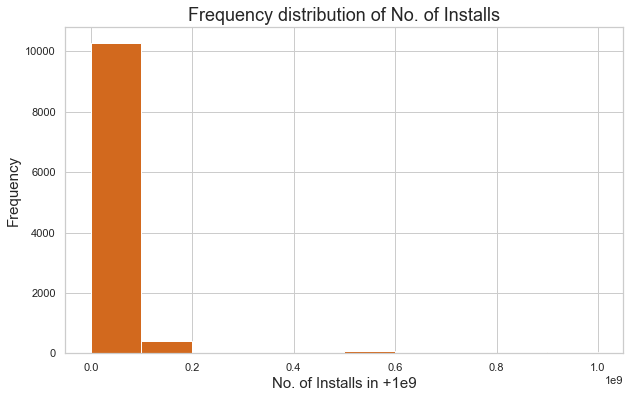

In [95]:
df.hist(column='Installs', figsize = (10,6), color = 'chocolate')
plt.xlabel("No. of Installs in +1e9", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of No. of Installs', fontsize = 18)

### 2.2.3. `Reviews`

Text(0.5, 1.0, 'Frequency distribution of No. of Reviews')

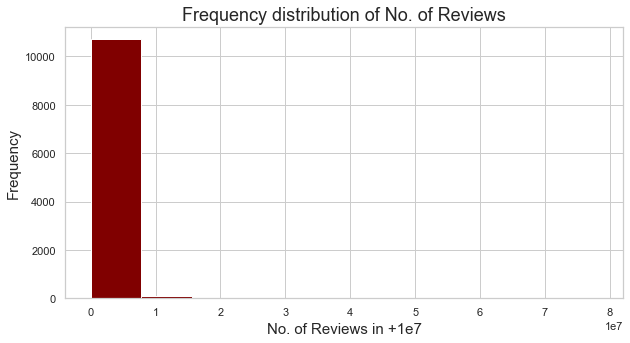

In [96]:
df.hist(column='Reviews', figsize = (10,5), color = 'maroon')
plt.xlabel("No. of Reviews in +1e7", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of No. of Reviews', fontsize = 18)

### 2.2.4. `Rating`

Text(0.5, 1.0, 'Frequency distribution of Rating')

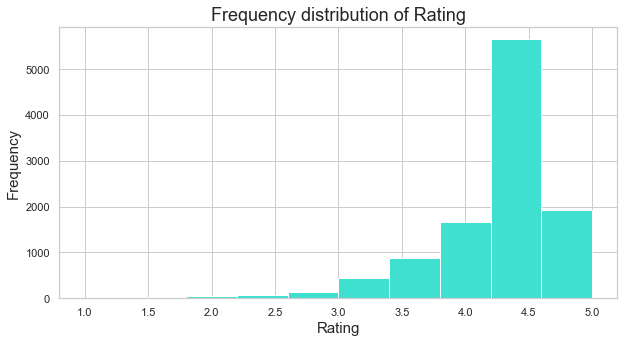

In [97]:
df.hist(column='Rating', figsize = (10,5), color = 'turquoise')
plt.xlabel("Rating", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Rating', fontsize = 18)

### 2.2.5. `Price`

Text(0.5, 1.0, 'Frequency distribution of Price')

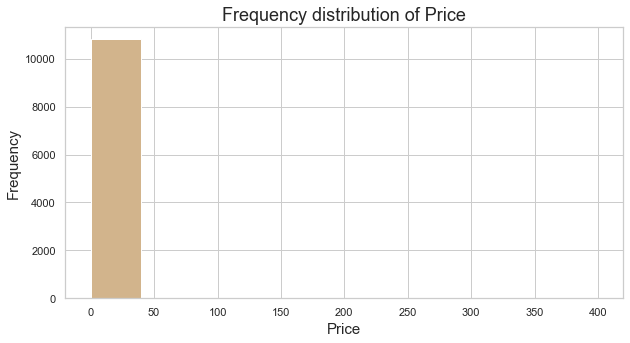

In [98]:
df.hist(column='Price', figsize = (10,5), color = 'tan')
plt.xlabel("Price", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution of Price', fontsize = 18)

### 2.3. Unique app 'categories' and their counts

In [99]:
df.Category.value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

### 2.4. Group entire data as per 'Category'

In [100]:
df_category = df.groupby(['Category']).count()
df_category.head(3)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Days
Category,,,,,,,,,,,,,
ART_AND_DESIGN,64,64,64,64,64,64,64,64,64,64,64,64,64
AUTO_AND_VEHICLES,85,85,85,85,85,85,85,85,85,85,85,85,85
BEAUTY,53,53,53,53,53,53,53,53,53,53,53,53,53


### 2.5.  Check distribution of 'Category' and display top categories, counts of apps in each category


The 'Categories' and the count of apps in them are: 


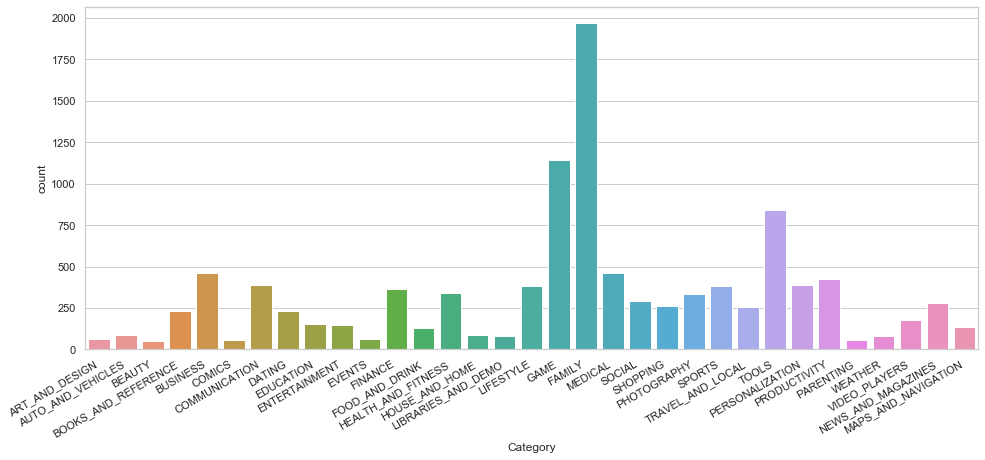

The top 6 categories and the count of apps in them are: 


,Category,Count of Apps
11,FAMILY,1968
14,GAME,1144
29,TOOLS,841
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424


In [101]:
print('\n' + "The 'Categories' and the count of apps in them are: ")
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 7)
    fig.autofmt_xdate()
    countplot = sns.categorical.countplot(df.Category,ax=ax)
    plt.show(countplot)
plot_number_category()

# Display top 6 categories which were installed
print("The top 6 categories and the count of apps in them are: ")
top_categories = df.groupby('Category').size().reset_index(name = 'Count of Apps').nlargest(6,'Count of Apps')
display(top_categories)

**Observation:** As we see in the data above, `Family` and `Game` category rule the app market, followed by 'Tools', 'Productivity' and 'Medical'.

Now, we have compared these 5 catogories with their actual installs or counts. For this, the **sum total of the `Installs`** will be used to compare.

### 2.6.  Check distribution of 'Category' and sum total of 'Installs' in the categories

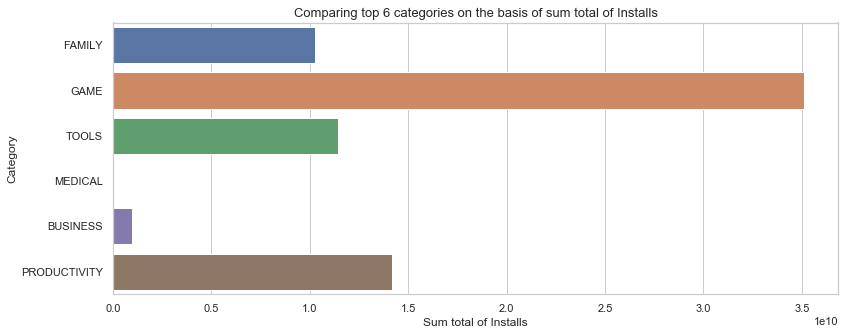


Tabular Representation of Top 6 Total Number of Installations by Category


,Category,Sum total of Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452271905
11,FAMILY,10258203405


In [102]:
cat = top_categories.Category.tolist()
data_top6 = df.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Sum total of Installs')
data = df.groupby('Category')['Installs'].agg('sum').reset_index(name='Sum total of Installs')

#Comparing only top 6 categories on the basis of sum total of 'Installs'
def compare_6(data):
    fig = plt.figure(figsize=(13,5))
    title=plt.title('Comparing top 6 categories on the basis of sum total of Installs', fontsize = 13)
    bar=sns.barplot(y=data['Category'],x=data['Sum total of Installs'])
    plt.show(bar)
compare_6(data_top6)

print('\nTabular Representation of Top 6 Total Number of Installations by Category')
display(data.nlargest(6,'Sum total of Installs'))

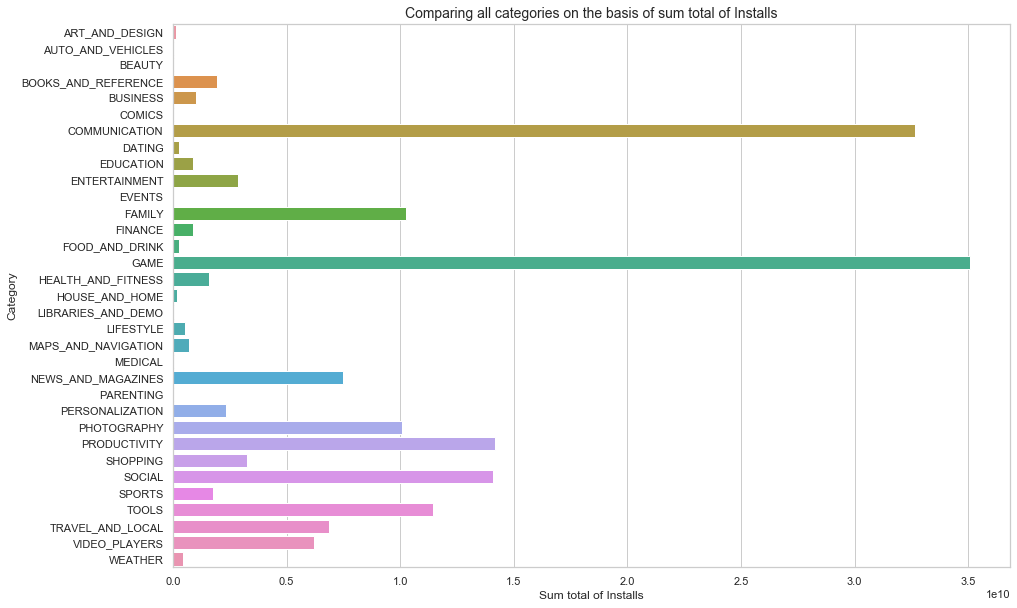

In [103]:
#Comparing all categoryies on the basis of 'Installs'
def compare_all(data):
    fig = plt.figure(figsize=(15,10))
    title=plt.title('Comparing all categories on the basis of sum total of Installs', fontsize = 14)
    bar=sns.barplot(y=data['Category'],x=data['Sum total of Installs'])
    plt.show(bar)
compare_all(data)

**Observation:** `Family` which was #1 in the count of categories or number of apps developed, turned up be #6 when looking at the sum total of the `Installs`. As we have seen, list of Top 6 Categories (acc. to number of apps developed) and Top 6 categories (acc. to number of Installs) differ a lot.

This information will be useful to developers to decide future projects.

### 2.7.  'Installs' and 'Type' - Free vs Paid

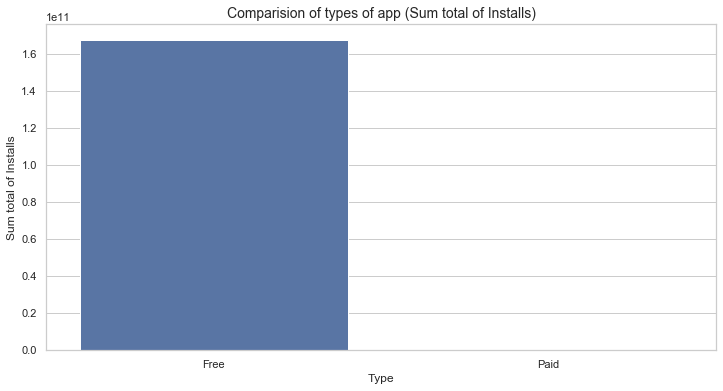

In [104]:
install_sum_type = df.groupby('Type')['Installs'].agg('sum').reset_index(name='Sum total of Installs')

def type_bar_sum(data):
    fig=plt.figure(figsize=(12,6))
    title = plt.title('Comparision of types of app (Sum total of Installs)', fontsize = 14)
    content_bar = sns.barplot(x=data['Type'],y=data['Sum total of Installs'])
    plt.show(content_bar)

type_bar_sum(install_sum_type)

**Observation:** It seems like there is only the `Free` apps.

### 2.8.  Check the number of words in 'App' name, and its impact on total number of 'Installs'

We have made a feature column called `Name_check`: 'App' name greater than 2 words or not.

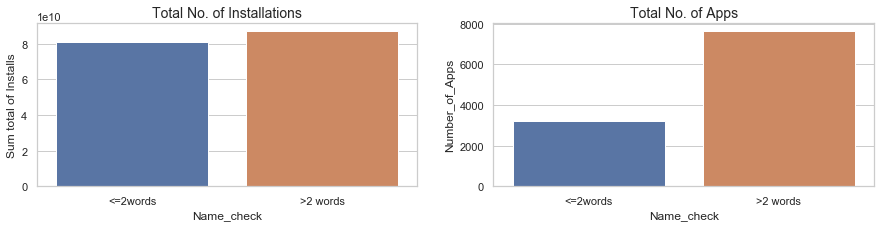

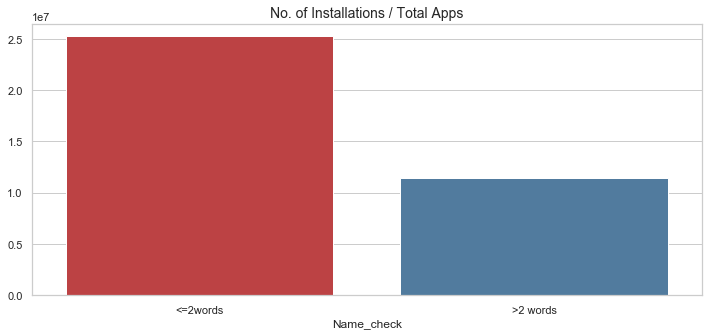

In [105]:
df['Name_check'] = ['>2 words' if len(x.split())>2 else '<=2words' for x in df['App'] ]

data_install = df.groupby('Name_check')['Installs'].agg('sum').reset_index(name = 'Sum total of Installs')
data_apps = df.groupby('Name_check').size().reset_index(name = 'Number_of_Apps')

fig,axes = plt.subplots(figsize=(15,3),ncols=2, nrows=1)
title = axes[0].set_title("Total No. of Installations", fontsize = 14)
title = axes[1].set_title("Total No. of Apps", fontsize = 14)

plot1 = sns.barplot( x=data_install['Name_check'],y = data_install['Sum total of Installs'] , ax = axes[0])
plot2 = sns.barplot( x=data_apps['Name_check'],y = data_apps['Number_of_Apps'] , ax = axes[1])
plt.show(fig) 

# No. of installations / No. of apps
figure = plt.figure(figsize=(12,5))
title = plt.title("No. of Installations / Total Apps", fontsize = 14)
plot3 = sns.barplot(x = data_apps['Name_check'],y = data_install['Sum total of Installs']/data_apps['Number_of_Apps'],
                    palette=sns.color_palette(palette="Set1",n_colors=2,desat=.8))
plt.show(figure)

**Observation:** As we can see above, it is better to have a small name for the apps.

### 2.9.  Max and Min 'Rating' values

In [106]:
print("The maximum app 'Rating' value is :", df.Rating.max())

print('\n' + "The minimum app 'Rating' value is :", df.Rating.min())

The maximum app 'Rating' value is : 5.0

The minimum app 'Rating' value is : 1.0


### 2.10. 'Content Rating' distribution

Text(0.5, 1.0, 'Distribution of Content Rating')

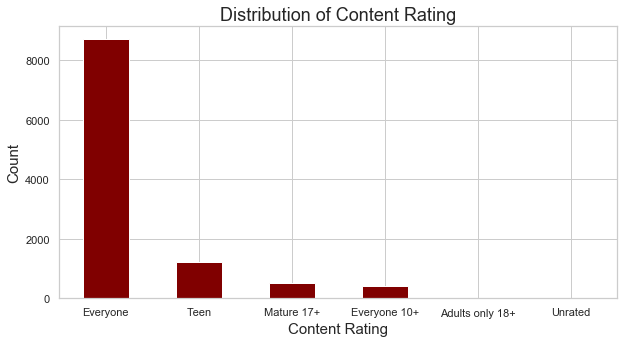

In [107]:
df['Content Rating'].value_counts().plot(kind='bar', figsize = (10,5), color = 'maroon', rot = 0)
plt.xlabel("Content Rating", fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of Content Rating', fontsize = 18)

### 2.11.  'Genres' - Split to primary and secondary

In [108]:
df.Genres.head()      # Category, and Subcategory basis

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [109]:
rest = df.Genres.apply(lambda x: x.split(';')[0])
df['Primary_Genre'] = rest
df.Primary_Genre.head(3)

0    Art & Design
1    Art & Design
2    Art & Design
Name: Primary_Genre, dtype: object

In [110]:
rest = df.Genres.apply(lambda x: x.split(';')[-1])
rest.unique()
df['Secondary_Genre']=rest
df.Secondary_Genre.head(3)

0    Art & Design
1    Pretend Play
2    Art & Design
Name: Secondary_Genre, dtype: object

In [111]:
grouped = df.groupby(['Primary_Genre','Secondary_Genre'])
grouped.size().head(3)

Primary_Genre  Secondary_Genre   
Action         Action                365
               Action & Adventure     17
Adventure      Action & Adventure     13
dtype: int64

In [112]:
# Create two-way table to understand relationships

twowaytable = pd.crosstab(index = df["Primary_Genre"], columns = df["Secondary_Genre"])
twowaytable.head(3)

Secondary_Genre,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Primary_Genre,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


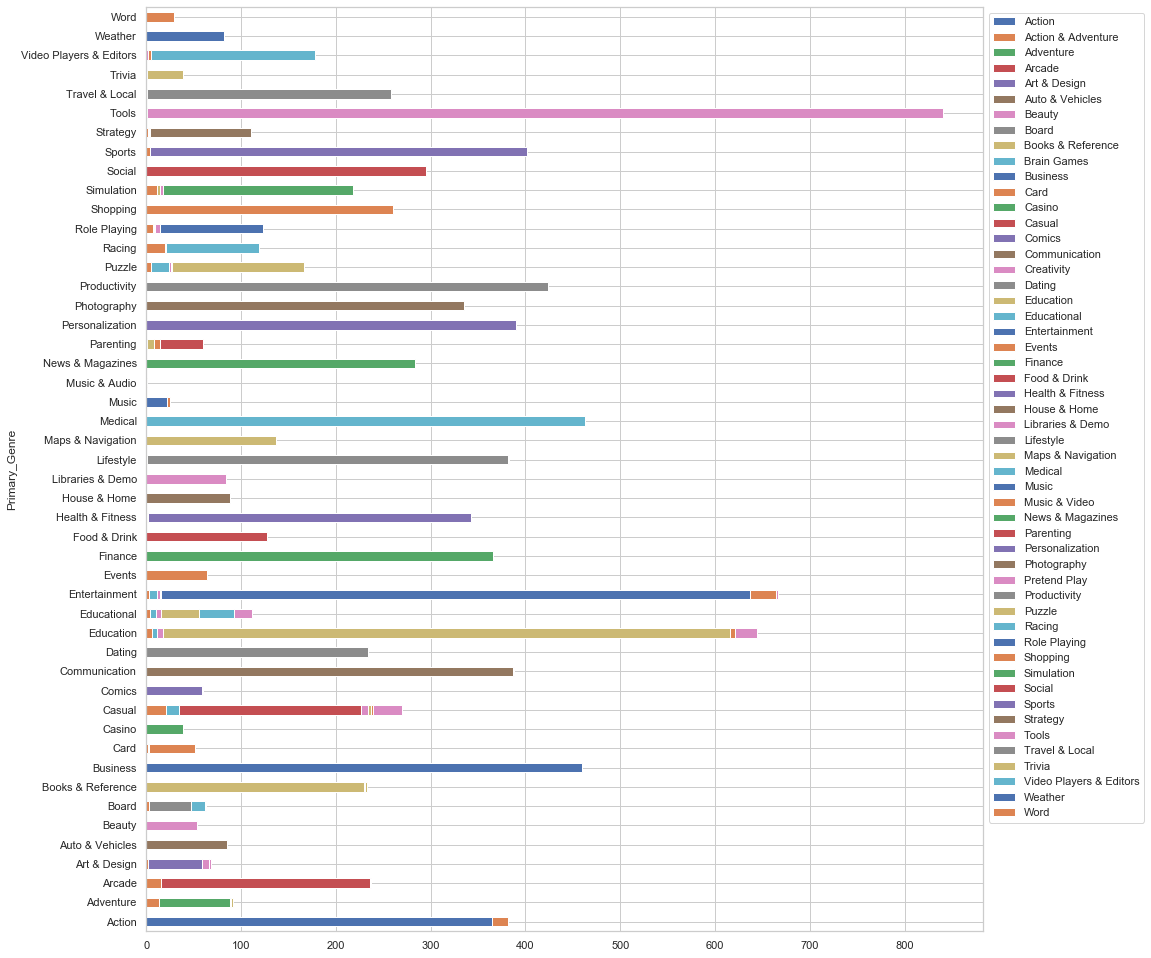

In [113]:
# Plot

twowaytable.plot(kind="barh", figsize=(15,17),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

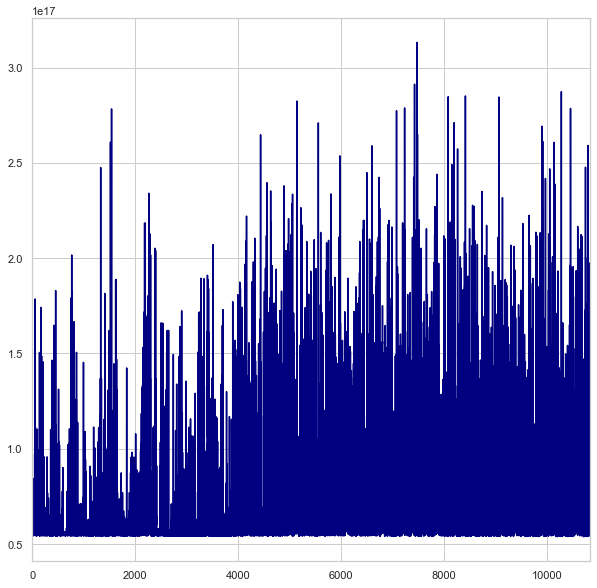

In [114]:
df.Last_Updated_Days.plot(figsize=(10,10), color = 'navy');

## 3. Machine Learning to Predict App Ratings

Converting categorical variables into numerical since some prediction algorithms do not work with categorical variables.

`Prepocessing` is a package that standardizes datasets for machine learning algorithms to work on them. Some of the utilities are 
- Variance scaling
- transforming the test data according to the 
- imputing missing values
- outlier handling
- encoding categorical variables into numeric values

`LabelEncoder` is a function that encodes target categorical variables with value between 0 and n_classes-1.

In [115]:
le = preprocessing.LabelEncoder()

In [116]:
# 'App' values encoding
df['App'] = le.fit_transform(df['App'])

In [117]:
# Dummy coding'Category' values
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]

df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

`get_dummies()` creates a column for every level of the categorical variable and drops the main column as seen below

In [118]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# 'Genres' features encoding
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [120]:
# 'Content Rating' features encoding
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [121]:
# 'Type' encoding
df['Type'] = pd.get_dummies(df['Type'])

In [122]:
# Last Updated encoding
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.strptime(x, '%B %d, %Y').timetuple()))

In [123]:
# clean all non numerical values & unicode charachters 

replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mean())


In [124]:
# Converting kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [125]:
# 'Size'  Cleaning
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0

df.Size = df.Size.replace('1,000+',1000)

df.Size = pd.to_numeric(df.Size)

## k-nearest neighbors

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its "`nearest neighbors`".

In [126]:
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 
            'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']

#### Splitting the data into train and test

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [128]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [129]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [130]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'


'Accuracy: 91.39%'

### Random Forest Model

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the `n_estimators parameter`. This parameter defines the number of trees in the random forest.

[(10, 0.92040039202965),
 (20, 0.9252910661215645),
 (30, 0.9254232280911793),
 (40, 0.9265211920313927),
 (50, 0.9266801856543622),
 (60, 0.9263450297903996),
 (70, 0.9274381854327385),
 (80, 0.9268427407179101),
 (90, 0.9268772556399651),
 (100, 0.9268784934409395),
 (110, 0.9274194203696358),
 (120, 0.9275599587285064),
 (130, 0.927722629098854),
 (140, 0.9279751117463014),
 (150, 0.9276974338786494),
 (160, 0.9283400349536316),
 (170, 0.9276089677798807),
 (180, 0.9278244188126707),
 (190, 0.927447843960993)]

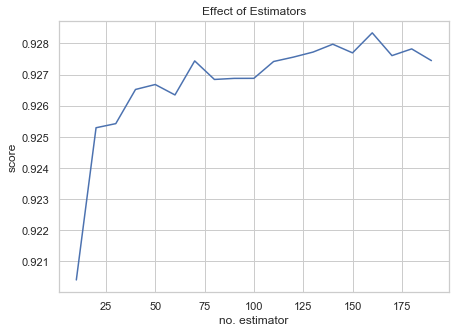

In [131]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [132]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.24307840317188847)

In [133]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4301934651384664)

## 4. Section - Sentiment Analysis

### 4.1 Load Reviews data and view head of data

In [25]:
file_path= '/Users/Ambi/Documents/OneDrive - Columbia University/5210 Python/Group Assignment/googleplaystore_user_reviews.csv'
data = pd.read_csv(file_path)
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### 4.2 Check Column Names

In [26]:
print("The columns for google play store reviews dataframe are: " +"\n")
print(data.columns.tolist())

The columns for google play store reviews dataframe are: 

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


### 4.3 View the number of records

In [27]:
print("The number of records in the google play store reviews dataframe are: ", data.shape[0])
print('\n' + "The number of columns in the google play store reviews dataframe are: ", data.shape[1])

The number of records in the google play store reviews dataframe are:  64295

The number of columns in the google play store reviews dataframe are:  5


### 4.4 Check for NAs

In [28]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [29]:
print("The percent of NA's in the data: ", 
      round(((data.Translated_Review.isnull().sum() / data.shape[0]) * 100),2), "%")

The percent of NA's in the data:  41.79 %


Seems like NA data is consistent across the data rows. Dropping the NA values for sentiment analysis

In [30]:
data = data.dropna()

### 4.5 Sentiment distribution

In [31]:
data['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Plot the sentiment count

Text(0.5, 1.0, 'Count of Sentiments')

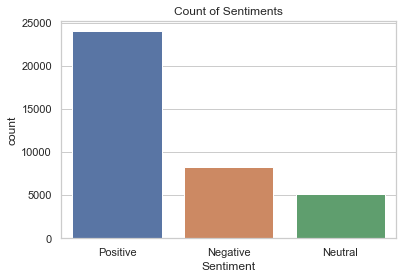

In [32]:
sns.countplot(data.Sentiment,order = data['Sentiment'].value_counts().index )
plt.title("Count of Sentiments")

### 4.6 Data Processing and Analysis

We have imported Regular expression library for deleting characters which are not letters. We test it on a sample review comment initially.

In [33]:
first_sample = data.Translated_Review[9] 
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()
print("[{}] convert to \n[{}]".format(data.Translated_Review[9],sample))

[It helpful site ! It help foods get !] convert to 
[it helpful site   it help foods get  ]


Find the StopWords, with the help of Natural Language Tool Kit (nltk) library

In [34]:
#tokenize helps in splitting the sentence
sample=nltk.word_tokenize(sample)
print(sample)

['it', 'helpful', 'site', 'it', 'help', 'foods', 'get']


In [35]:
sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample)

['helpful', 'site', 'help', 'foods', 'get']


Removing symbols, converting all characters to lower case and removing the stopwords

In [48]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0, 37427):
    review = re.sub('[^a-zA-Z]', ' ',data['Translated_Review'].iloc[i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['Translated_Review'].iloc[i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',data['Translated_Review'].iloc[i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [51]:
words = []
Sentiment_Polarity = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))
    Sentiment_Polarity.append
words

['like',
 'eat',
 'delici',
 'food',
 'hat',
 'cook',
 'food',
 'case',
 '10',
 'est',
 'ood',
 'help',
 'lot',
 'also',
 'est',
 'efor',
 'helf',
 'ife',
 'help',
 'eat',
 'healthi',
 'exercis',
 'regular',
 'basi',
 'ork',
 'great',
 'especi',
 'go',
 'groceri',
 'store',
 'est',
 'idea',
 'us',
 'est',
 'way',
 'maze',
 'ook',
 'forward',
 'app',
 'help',
 'site',
 'help',
 'food',
 'get',
 'good',
 'seful',
 'inform',
 'amount',
 'spell',
 'error',
 'question',
 'valid',
 'inform',
 'share',
 'nce',
 'fix',
 '5',
 'star',
 'given',
 'hank',
 'reat',
 'app',
 'dd',
 'arthriti',
 'eye',
 'immun',
 'kidney',
 'liver',
 'detox',
 'food',
 'pleas',
 'reatest',
 'ever',
 'omplet',
 'awesom',
 'maintain',
 'health',
 'must',
 'ppl',
 'ove',
 'ood',
 'health',
 'ood',
 'health',
 'first',
 'prioriti',
 'ealth',
 'import',
 'world',
 'either',
 'life',
 'think',
 'rs',
 'sunita',
 'bhati',
 'thank',
 'develop',
 'make',
 'kind',
 'app',
 'realli',
 'good',
 'healthi',
 'food',
 'bodi',
 'er

In [52]:
from collections import Counter
words_counts = Counter(words)

In [53]:
most_common_words = sorted(words_counts.items(), key = lambda x:x[1], reverse=True)
most_common_wordsList = []
most_common_CountList = []
for x, y in most_common_words:
    most_common_wordsList.append(x)
    most_common_CountList.append(y)

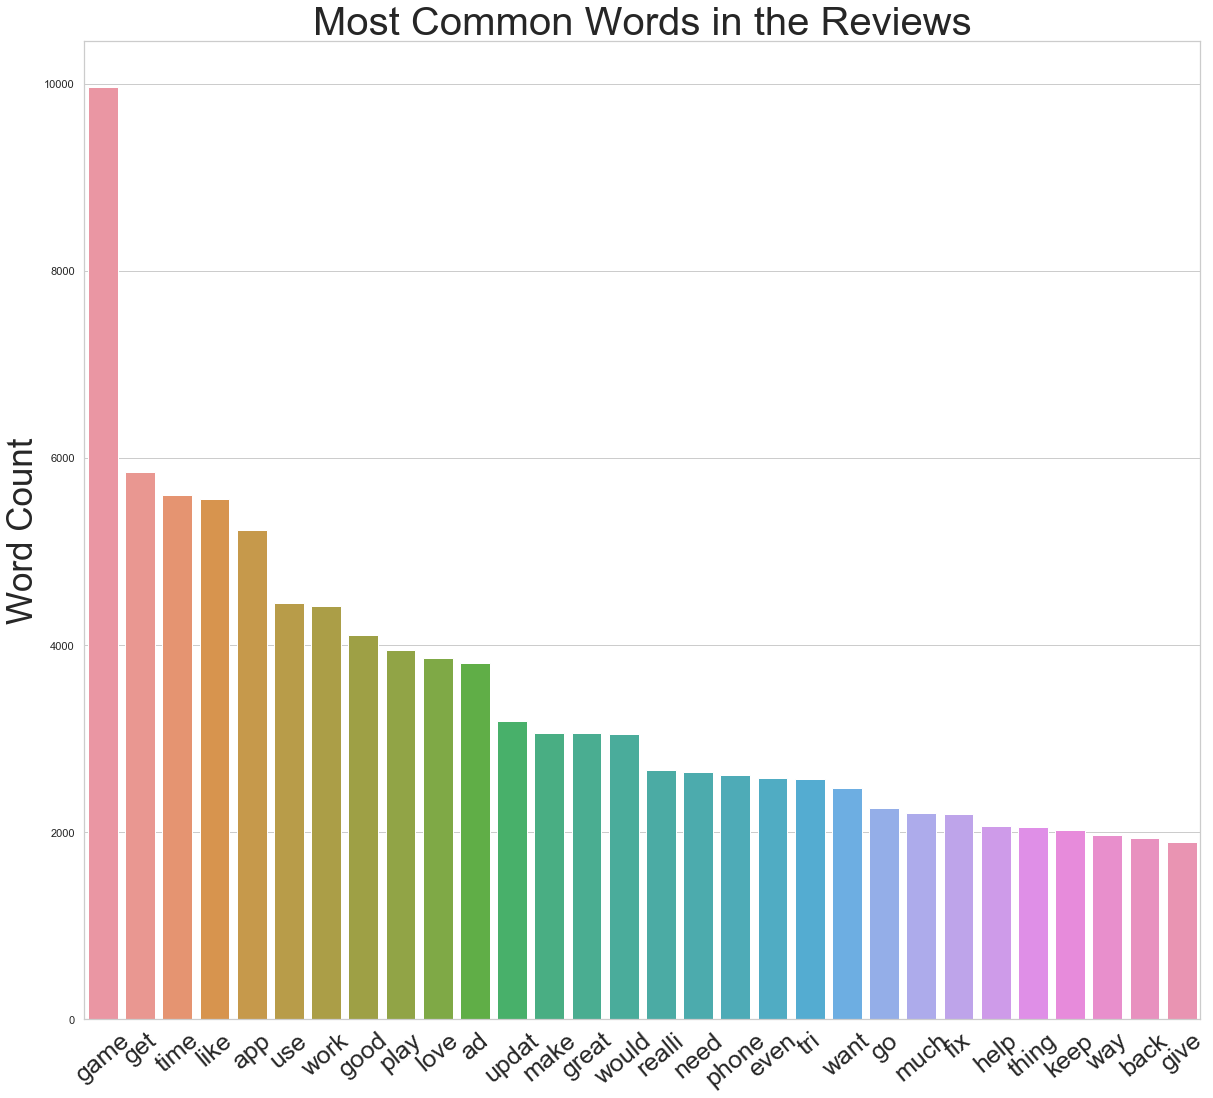

In [54]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_common_CountList[0:30])
plt.ylabel('Word Count', fontsize = 35)
plt.xticks(np.arange(30), most_common_wordsList[0:30], rotation= 40, fontsize = 25)
plt.title('Most Common Words in the Reviews', fontsize = 40)
plt.show()

In [56]:
k = most_common_wordsList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        if i in z and data['Sentiment'].iloc[corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and data['Sentiment'].iloc[corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and data['Sentiment'].iloc[corpus.index(z)]=='Negative':
            Negative.append(i)

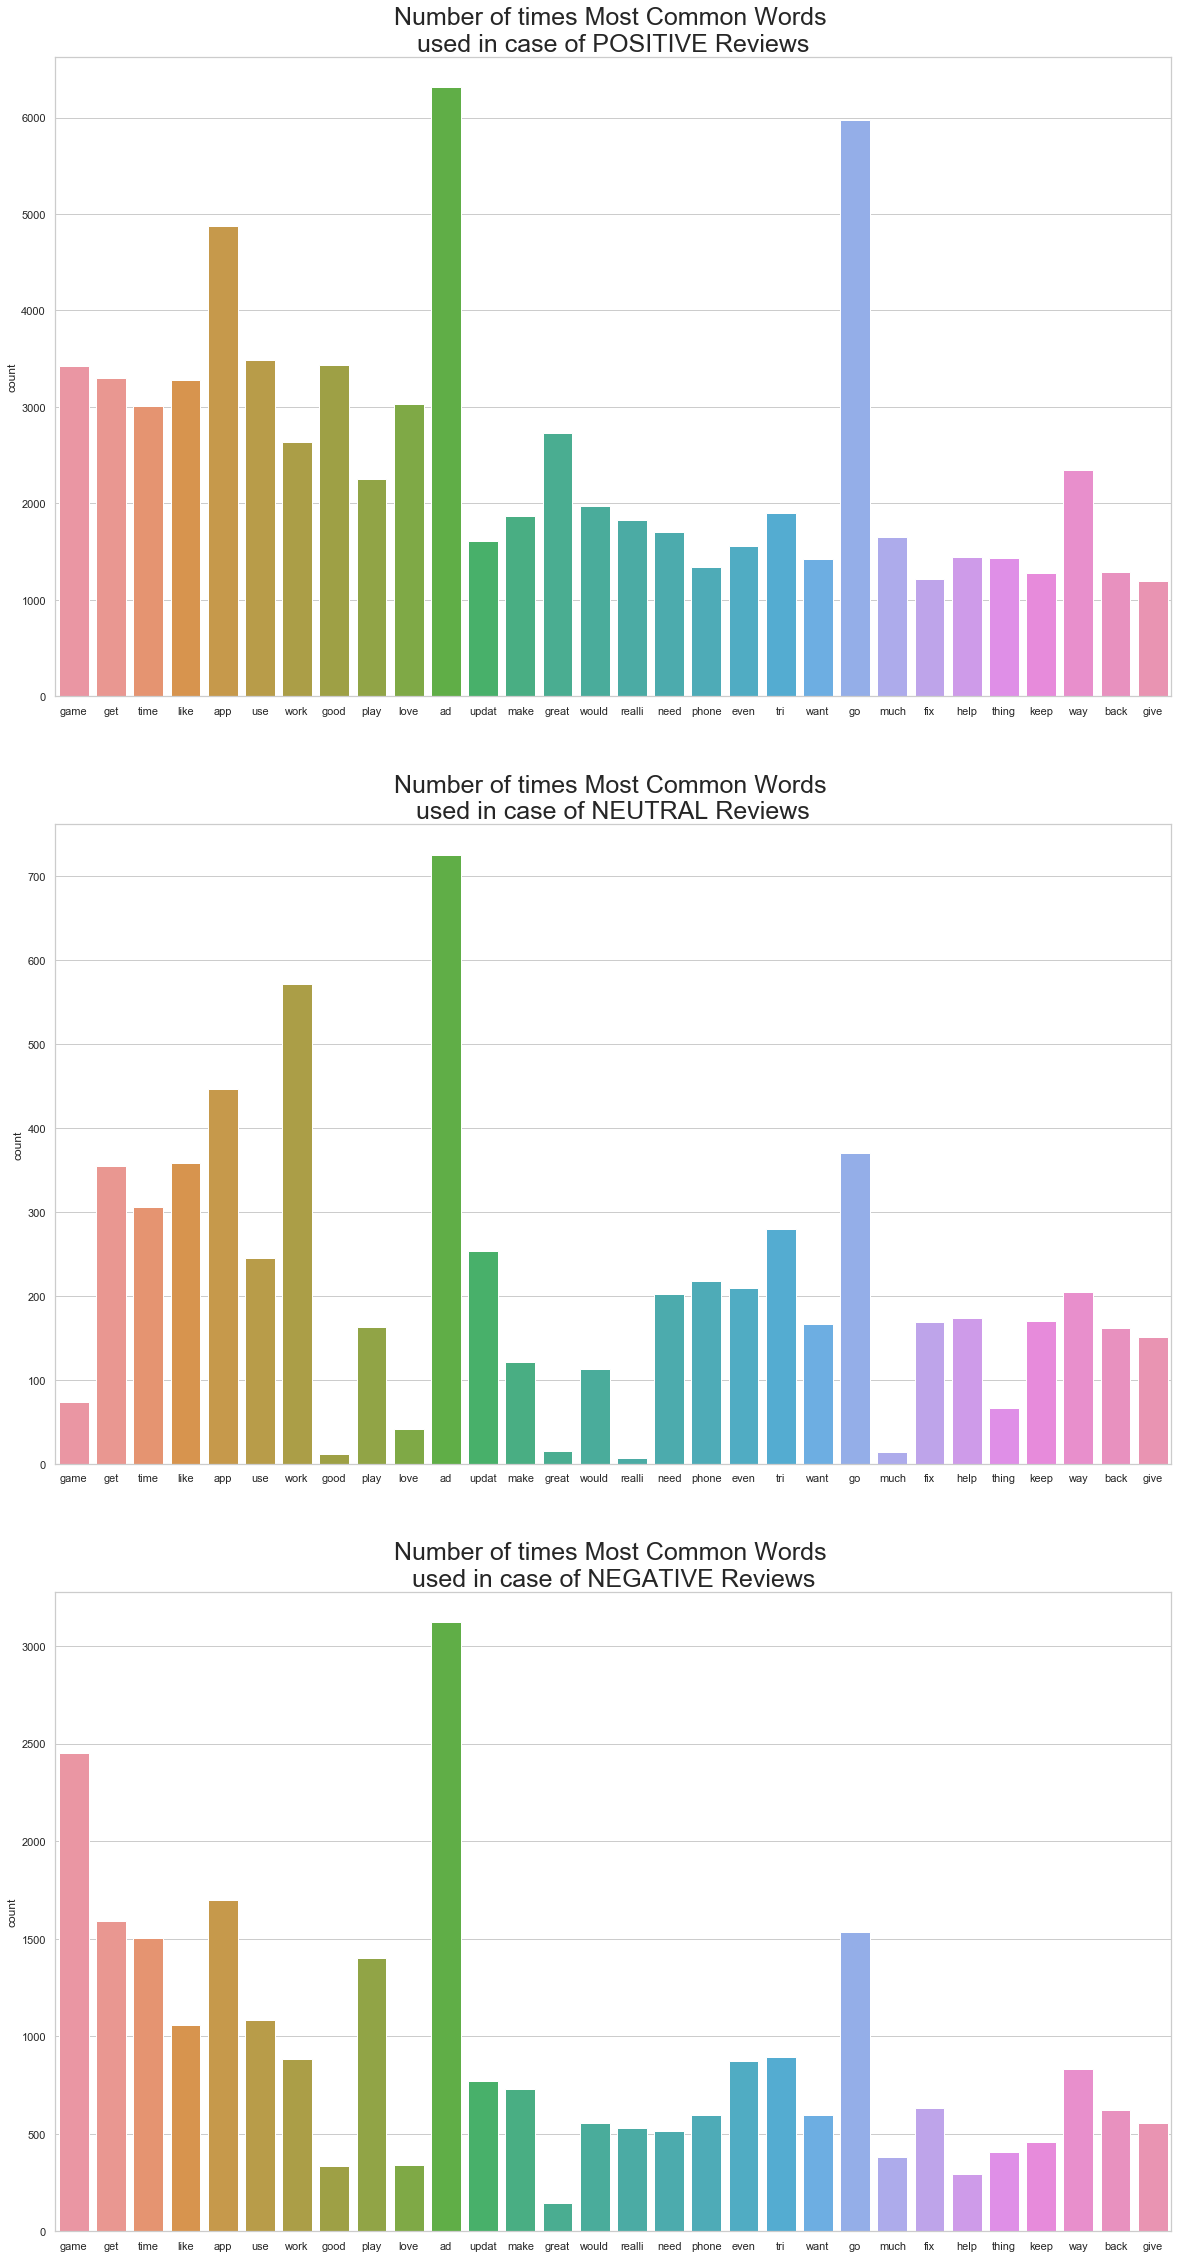

In [57]:
f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviews",fontsize=25)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviews",fontsize=25)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviews",fontsize=25)
plt.show()

# C.  Major Findings

In [5]:
# - Average rating of (active) apps on Google Play Store is 4.19 with size 2.11 MB.
# - Users generally prefer to install free apps over paid applications but averagely pay ~ 1 USD per app.
# - Top 5 categories of applications in the Play store are of the category of Family, Game and Tools.
# - Most number of apps installed belong to the family of Game, Communication and Productivity. Thus, Top 6 Categories of developed vs installed differ.
# - Most preferred installed apps have a name comprised of less than 2 words.
# - Most installed apps are either downloaded by everyone or teenagers with a few downloaded by 17+ aged group of users.
# - Users tend to download a given app more if it has been reviewed by a large number of people.
# - The predictions of the app ratings suggest that, with 91% accuracy an app can have more than 100,000+ installs and be a hit on the Google Play Store. 
# - Health and Fitness apps receive more than 85% positive reviews with positive words in reviews such as app, ad, go and way.
# - Game and Social apps receive mixed feedback - 50% positive and 50% negative 

# D.  Insight into Practical Applications

In [6]:
#We recommend Android apps to have the following elements to be a top-rated & top-downloaded app:    
#- *Highest Number of Install by Categories:*
#    - Game
#    - Communication
#
#- *Leading Primary Genre*
#    - Tools
#    - Education
#    - Entertainment
#
#- *Price:* Free 
#
#- *App Name:* One Word
#
#- *Content type:* Everyone
#
#- *Monetization:* Ads
#
#- *Features:* 
#    - Quick load
#    - Low usage of phone battery
#    - Ads
#        - Type
#        - Duration
#        - Frequency

# E.  Future Outlook

In [ ]:
#- *App developers and designers:*
#    - Use code that can be reused and uses less processing time
#    - Focus on best user experience
#    - Explore varied-apps from different categories as well as iOS platform to get insights on what makes an app useful
#        - ~30% of apps fall under "Family", "Game", "Tools" categories, these are the biggest categories
#    
#   
#- *App owners:*
#    - Apps that are a combination of their passion + user needs
#        - Sentiment analysis proves that users care about "game", "ad", "phone", "time", "go"
#    - Develop plans to update apps with new features before users reach attrition rate
#    - Analyze app-related data frequently to optimize app better
#        - Of the ~11K reviews, about 50% of the apps are rated at 4.5, so it is very hard to stand out
#    
#    
#- *Google Play Store:*
#    - Detailed breakdown on Primary and Secondary Genres
#    - Ad stats breakdown
#    - Churn Rate by Genre, Category, Associated Ad, Demographics
#    - Provide detailed breakdown on user Demographics, to have suited apps